# Download US patent data


### WRDS

Downloaded from
https://wrds-www.wharton.upenn.edu/login/?next=/pages/get-data/wrds-us-patents/compustat-link/



US Patent Public Search tool:

https://ppubs.uspto.gov/pubwebapp/


| Type | Query |
|---|---|
| Search for keywords<br>in all document | (Cryptocurrency OR bitcoin OR ethereum OR "distributed ledge" OR "consensus mechanism"<br>OR "smart contract" OR "digital asset" OR "non-fungible token" OR <br>"decentralized finance" OR "initial coin offering" OR "decentralized autonomous organization"<br>OR "decentralized application") AND @pd>="2010"<2011 |
| Search in the abstract<br>and brief summary | ((blockchain.ab. OR blockchain.bsum.) OR (Cryptocurrency.ab. OR Cryptocurrency.bsum.) <br>OR (bitcoin.ab. OR bitcoin.bsum.) OR (ethereum.ab. OR ethereum.bsum.) OR <br>("distributed ledge".ab. OR "distributed ledge".bsum.) OR ("consensus mechanism".ab. <br>OR "consensus mechanism".bsum.) OR ("smart contract".ab. OR "smart contract".bsum.) <br>OR ("digital asset".ab. OR "digital asset".bsum.) OR ("non-fungible token".ab. OR <br>"non-fungible token".bsum.) OR ("decentralized finance".ab. OR "decentralized finance".bsum.)<br>OR ("initial coin offering".ab. OR "initial coin offering".bsum.) OR<br>("decentralized autonomous organization".ab. OR "decentralized autonomous organization".bsum.) <br>OR ("decentralized application".ab. OR "decentralized application".bsum.)) |

These are the two ways that the patent database could be queried but fo the purpose of this research, we will first extract the keywords from the patent's ABSTARCT and BRIEF SUMMARY

Save the results "filingDate" and "patentNumber" into a csv file: "query_absBsm_USPT.csv"

# For Great Britain

https://worldwide.espacenet.com/patent/search?f=cc%3Ain%3Dgb&q=%28ab%20%3D%20%22Blockchain%22%20OR%20desc%20%3D%20%22Blockchain%22%29%20OR%20%28ab%20%3D%20%22Cryptocurrency%22%20OR%20desc%20%3D%20%22Cryptocurrency%22%29%20OR%20%28ab%20%3D%20%22bitcoin%22%20OR%20desc%20%3D%20%22bitcoin%22%29%20OR%20%28ab%20%3D%20%22consensus%20mechanism%22%20OR%20desc%20%3D%20%22consensus%20mechanism%22%29%20OR%20%28ab%20%3D%20%22smart%20contract%22%20OR%20desc%20%3D%20%22smart%20contract%22%29%20OR%20%28ab%20%3D%20%22digital%20asset%22%20OR%20desc%20%3D%20%22digital%20asset%22%29%20OR%20%28ab%20%3D%20%22non-fungible%20token%22%20OR%20desc%20%3D%20%22non-fungible%20token%22%29%20OR%20%28ab%20%3D%20%22decentralized%20finance%22%20OR%20desc%20%3D%20%22decentralized%20finance%22%29%20OR%20%28ab%20%3D%20%22initial%20coin%20offering%22%20OR%20desc%20%3D%20%22initial%20coin%20offering%22%29%20OR%20%28ab%20%3D%20%22decentralized%20autonomous%20organization%22%20OR%20desc%20%3D%20%22decentralized%20autonomous%20organization%22%29%20OR%20%28ab%20%3D%20%22decentralized%20application%22%20OR%20desc%20%3D%20%22decentralized%20application%22%29&queryLang=en%3Ade%3Afr

| Type | Query |
|---|---|
| Search in the abstract<br>and description | (ab = "Blockchain" OR desc = "Blockchain") OR (ab = "Cryptocurrency" OR desc = "Cryptocurrency") OR (ab = "bitcoin" OR desc = "bitcoin") OR (ab = "consensus mechanism" OR desc = "consensus mechanism") OR (ab = "smart contract" OR desc = "smart contract") OR (ab = "digital asset" OR desc = "digital asset") OR (ab = "non-fungible token" OR desc = "non-fungible token") OR (ab = "decentralized finance" OR desc = "decentralized finance") OR (ab = "initial coin offering" OR desc = "initial coin offering") OR (ab = "decentralized autonomous organization" OR desc = "decentralized autonomous organization") OR (ab = "decentralized application" OR desc = "decentralized application") |

These are the two ways that the patent database could be queried but fo the purpose of this research, we will first extract the keywords from the patent's ABSTARCT and DESCRIPTION

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [62]:
df_meta = pd.read_csv("uspatents_meta.csv", low_memory=False)
df_meta.patnum = pd.to_numeric(df_meta.patnum, errors='coerce', downcast='integer')
print(df_meta[["patnum", "grantdate", "appldate"]].head(5))

df_link = pd.read_csv("uspatents_gvkey_linking.csv", low_memory=False)
df_link.patnum = pd.to_numeric(df_link.patnum, errors='coerce', downcast='integer')
print(df_link[["patnum", "gvkey_numeric"]].head(5))

df_list = pd.read_csv("query_absBsm_USPT.csv", low_memory=False)
df_list.patentNumber = pd.to_numeric(df_list.patentNumber, errors='coerce', downcast='integer')
print(df_list.head(5))

df_UKlist = pd.read_csv("query_absDesc_Espace.csv", low_memory=False)
df_UKlist.familyNumber = pd.to_numeric(df_UKlist.familyNumber, errors='coerce', downcast='integer')
print(df_UKlist.head(5))


      patnum   grantdate    appldate
0  7865968.0  2011-01-11  2006-04-18
1  7865969.0  2011-01-11  2005-02-03
2  7865976.0  2011-01-11  2006-10-04
3  7865977.0  2011-01-11  2007-01-19
4  7865978.0  2011-01-11  2008-08-26
      patnum  gvkey_numeric
0  7865968.0           7435
1  7865982.0           5639
2  7865983.0           5639
3  7865988.0         116504
4  7865990.0         251303
   filingDate  patentNumber
0  25/06/2009  2.010033e+10
1  25/04/2005  7.860830e+06
2  09/03/2005  7.860013e+06
3  22/06/2009  2.010032e+10
4  05/03/2008  7.856604e+06
   filingDate  familyNumber                                            company
0  10/04/2019      72749305  AKIVA CAPITAL HOLDINGS LLC [US] \nAKIVA CAPITA...
1  23/02/2016      58191502                           NCHAIN HOLDINGS LTD [AG]
2  29/04/2016      56234104                           NCHAIN HOLDINGS LTD [AG]
3  27/09/2020      80624746                                           IBM [US]
4  23/02/2016      58231665                    

In [63]:
# Assuming 'filingDate' column contains dates in 'dd/mm/yyyy' format
df_list['filingDate'] = pd.to_datetime(df_list['filingDate'], format="%d/%m/%Y")

# Filter rows with 'filingDate' from 2010 to 2022
df_list = df_list[(df_list['filingDate'].dt.year > 2009) & (df_list['filingDate'].dt.year <= 2015)]
print(len(df_list))
print(len(df_list.drop_duplicates(subset=["patentNumber"])))

1132
1132


In [64]:
# Assuming 'filingDate' column contains dates in 'dd/mm/yyyy' format
df_UKlist['filingDate'] = pd.to_datetime(df_UKlist['filingDate'], format="%d/%m/%Y")

# Filter rows with 'filingDate' from 2010 to 2022
df_UKlist = df_UKlist[(df_UKlist['filingDate'].dt.year > 2009) & (df_UKlist['filingDate'].dt.year <= 2015)]
print(len(df_UKlist))
print(len(df_UKlist.drop_duplicates(subset=["familyNumber"])))

63
63


In [121]:


# Extract year from filingDate column
df_list['filingYear'] = df_list['filingDate'].dt.year

# Group by year and count the number of patents
patents_per_year = df_list['filingYear'].value_counts().sort_index()

# Calculate percentage increase in patents
#patents_per_year['percentage_increase'] = patents_per_year.pct_change() * 100
percentage_increase = patents_per_year.pct_change() * 100

# Calculate log difference in patents
#log_difference = np.log(patents_per_year).diff()

# Create a DataFrame with the correct structure
patents_data = {
    'filingYear': patents_per_year.index,
    'number_of_patents': patents_per_year.values,
    'percentage_increase': percentage_increase.values
}
patents_per_year_df = pd.DataFrame(patents_data)

print(patents_per_year_df)



   filingYear  number_of_patents  percentage_increase
0        2010                 95                  NaN
1        2011                127            33.684211
2        2012                145            14.173228
3        2013                134            -7.586207
4        2014                241            79.850746
5        2015                390            61.825726


In [122]:
# Extract year from filingDate column
df_UKlist['filingYear'] = df_UKlist['filingDate'].dt.year

# Group by year and count the number of patents
uk_patents_per_year = df_UKlist['filingYear'].value_counts().sort_index()

# Calculate percentage increase in patents
#patents_per_year['percentage_increase'] = patents_per_year.pct_change() * 100
uk_percentage_increase = uk_patents_per_year.pct_change() * 100

# Calculate log difference in patents
#log_difference = np.log(patents_per_year).diff()

# Create a DataFrame with the correct structure
uk_patents_data = {
    'filingYear': uk_patents_per_year.index,
    'number_of_patents': uk_patents_per_year.values,
    'percentage_increase': uk_percentage_increase.values
}
uk_patents_per_year_df = pd.DataFrame(uk_patents_data)

print(uk_patents_per_year_df)

   filingYear  number_of_patents  percentage_increase
0        2010                  6                  NaN
1        2011                  6             0.000000
2        2012                  1           -83.333333
3        2013                  5           400.000000
4        2014                 18           260.000000
5        2015                 27            50.000000


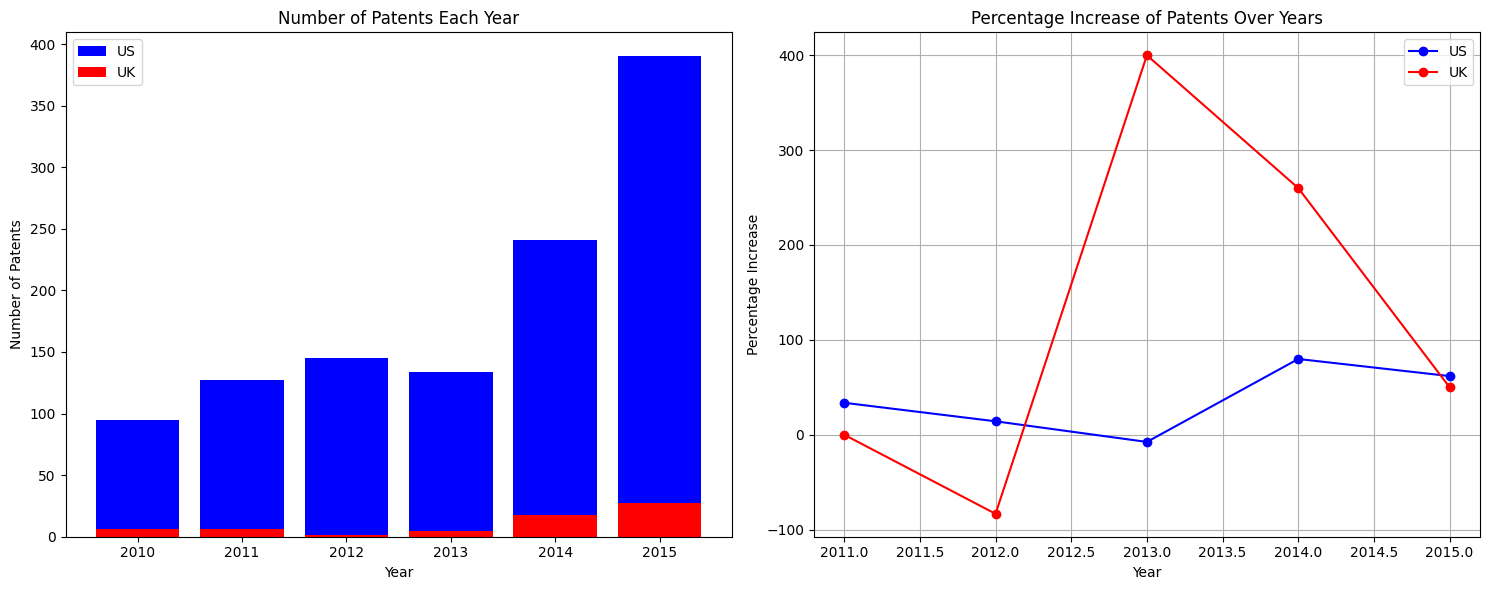

In [123]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for the number of patents
axes[0].bar(patents_per_year_df['filingYear'], patents_per_year_df['number_of_patents'], color='blue')
axes[0].bar(uk_patents_per_year_df['filingYear'], uk_patents_per_year_df['number_of_patents'], color='red')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Patents')
axes[0].set_title('Number of Patents Each Year')
axes[0].legend(['US', 'UK'])


# Line chart for percentage increase
axes[1].plot(patents_per_year_df['filingYear'], patents_per_year_df['percentage_increase'], color='blue', marker='o')
axes[1].plot(uk_patents_per_year_df['filingYear'], uk_patents_per_year_df['percentage_increase'], color='red', marker='o')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Percentage Increase')
axes[1].set_title('Percentage Increase of Patents Over Years')
axes[1].legend(['US', 'UK'])
axes[1].grid()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [124]:
# Load and preprocess the data
#patents_per_year_df['filingYear'] = pd.to_datetime(patents_per_year_df['filingYear'])
patents_per_year_df.set_index('filingYear', inplace=True)
print(patents_per_year_df.head(5))

            number_of_patents  percentage_increase
filingYear                                        
2010                       95                  NaN
2011                      127            33.684211
2012                      145            14.173228
2013                      134            -7.586207
2014                      241            79.850746


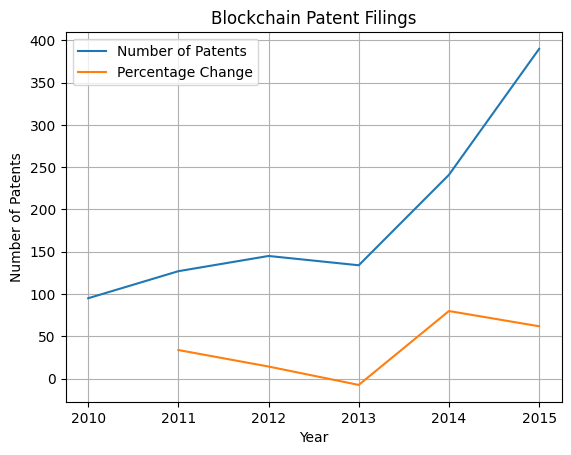

ADF Statistic: 1.681754726820302
p-value: 0.9980832481024345


In [135]:
# Visualize the time series data
plt.plot(patents_per_year_df)
plt.xlabel('Year')
plt.ylabel('Number of Patents')
plt.title('Blockchain Patent Filings')
plt.legend(['Number of Patents','Percentage Change'])
#plt.xticks(patents_per_year_df['filingYear'], rotation=45)
plt.grid()
plt.show()

# Perform Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(patents_per_year_df['number_of_patents'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Perform first differencing to make the data stationary
patents_per_year_df_diff = patents_per_year_df.diff().dropna()


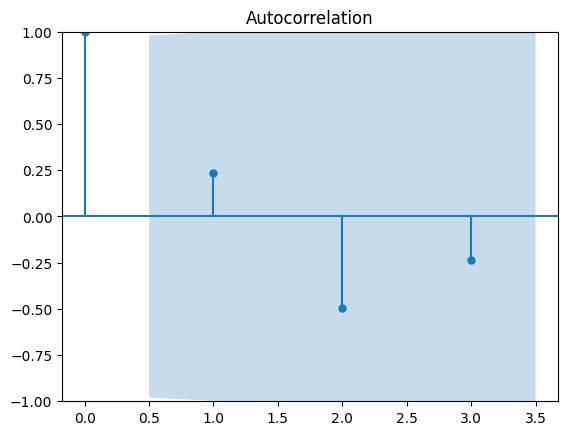

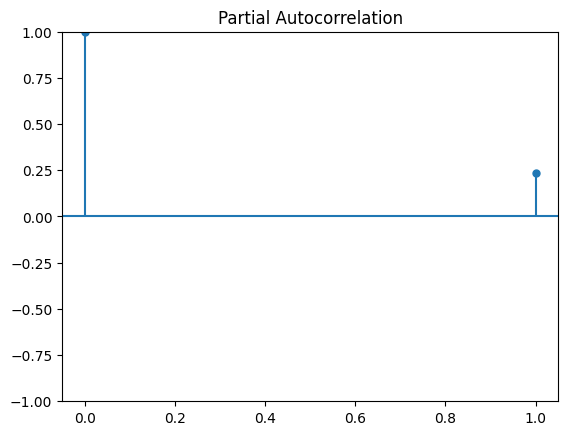

In [131]:
# Plot ACF and PACF plots
plot_acf(patents_per_year_df_diff['number_of_patents'])
plot_pacf(patents_per_year_df_diff['number_of_patents'], lags=1)  # Use a smaller number of lags
plt.show()
